# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} = 0. $$ 

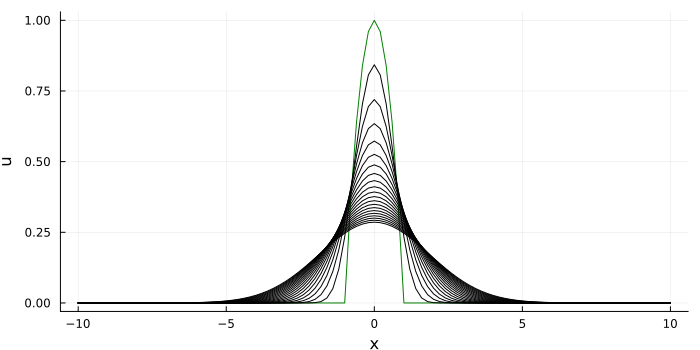

In [113]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size : augmente la diffusion lorsque sa valeur augmente
Nx = 100                               # grid size (space) : nb de points
Δx = 2*L/Nx                            # step size (space) : pas en espace
σ = 0.2                                # CFL : stabilité du schéma
Δt = σ * Δx^2                          # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(σ*ones(Nx), 1 .- 2*σ*ones(Nx+1), σ*ones(Nx))

for n = 1:Nt
    u = B*u
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

Etude de stabilité : 
Quand on change σ (quand on l'augmente) par exemple au delà de sa condition de stabilité (0.51 par exemple) alors la solution explose 

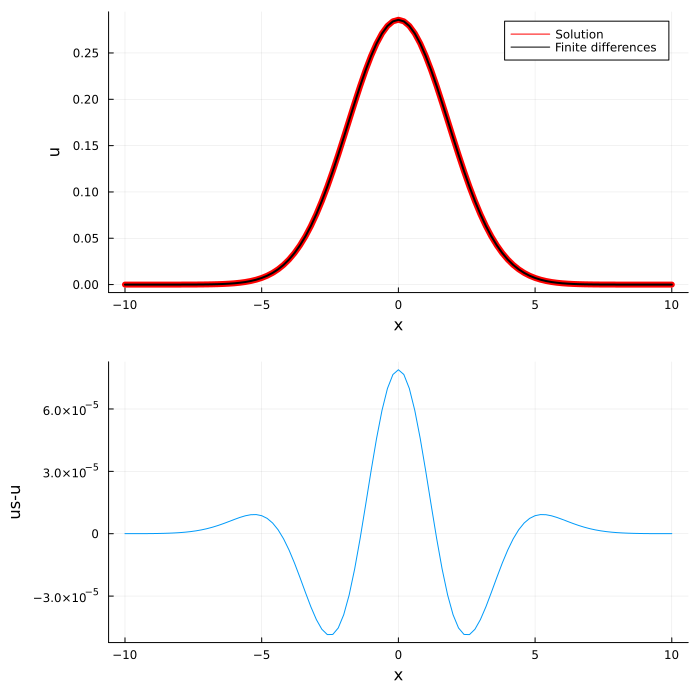

Δx: 0.2	 Δt:0.008000000000000002	 max error: 7.8871030018135e-5


In [114]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

Tâche n°1
Question 1)
Quand on fait diminuer delta_x alors, on observe que la courbe représentant la courbe "aux différences finies" se rapproche de la courbe "solution". (premier schéma)
Cela signifie que la solution se diffuse de plus en plus.

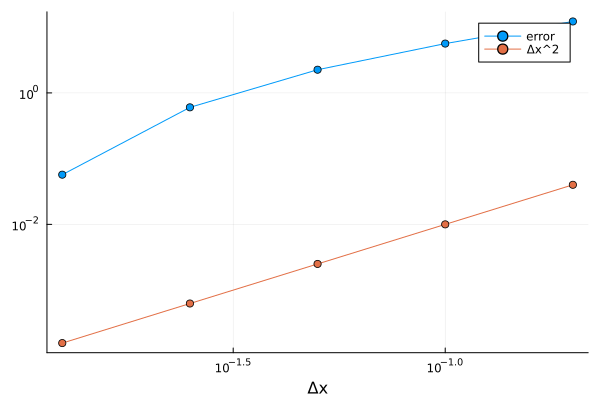

In [115]:
# Precision test
Δx = [ 0.2, 0.1 , 0.05 , 0.025 , 0.0125 ]
errx = [ 12.22245197268,5.631858890978,2.253617544959,0.6032332453396,0.05700103482349 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

Question 3)
Pour analyser l'ordre pour l'erreur en espace : on fixe un delta_t très petit pour que l'erreur ne depende que de delta_x.
On observe que les deux courbes sont parallèles donc l'erreur de troncature en espace est bien d'ordre 2 -> Δx²